## 관람객 토큰화 & 워드 클라우드

In [1]:
import re
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 전처리 파일 불러오기

In [2]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/theroundup_daum.csv'
encoding='cp949'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1330 non-null   int64 
 1   review  1330 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.9+ KB


In [4]:
rev.head()

,rating,review
0,10,오늘 나의 해방일지 프리퀄인 범죄도시2를 보고왔습니다.\n구씨가 왜 도랑을 뛰어넘고...
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...
2,10,"오늘 봤는데, 액션과 유머가 적절히 섞인 재미난 영화 한편이었어요^^ 새로운 감독에..."
3,3,아무리 흥행을 위해서라지만 너무 잔인합니다. 왜 우리 한국 영화가 이리도 잔인하게...
4,9,속편은 별로다는 선입견으로 별 기대 안하고 봤는데 전편만큼 재미있네요. 오락 영화로 만족


## 전처리 함수

In [8]:
#토큰화
#토큰화
def token_konlpy(text, tagset):
    okt=Okt()
    words=[]
    for word in okt.pos(text):
        if (tagset == None) or (word[0] in '손 석 구 강 해 상 장 이 수') :
            words.append(word[0])
        else:
            if (len(word[0])>1) and (word[1] in tagset) :
                words.append(word[0])
    return words

#데이터 전처리
def review_preproces_ko(data, stop_words, tagset):
    data = str(data)
    if '스포일러가 포함된 감상평입니다. 감상평 보기' in data:
        data = data.replace('스포일러가 포함된 감상평입니다. 감상평 보기', '')
    line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", data) # 한글 외 특수문자 제거

    words=token_konlpy(line_text, tagset)   # 토큰화
    
    if ('손' in words)or('석' in words)or('구' in words)or('강' in words)or('해' in words)or('상' in words)or('장' in words)or('이' in words)or('수' in words) :
        word_join = ' '.join(words)
        if '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구의' in word_join :
            word_join = word_join.replace('손 석 구의', '손석구')
        elif '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구씨' in word_join :
            word_join = word_join.replace('손 석 구씨', '손석구')
        elif '손 석 구가' in word_join :
            word_join = word_join.replace('손 석 구가', '손석구')
        elif '손 석 구만' in word_join :
            word_join = word_join.replace('손 석 구만', '손석구')
        elif '손 석 구' in word_join :
            word_join = word_join.replace('손 석 구', '손석구')
        elif '강해 상의' in word_join :
            word_join = word_join.replace('강해 상의', '강해상')
        elif '강해 상이' in word_join :
            word_join = word_join.replace('강해 상이', '강해상')
        elif '강 해상도' in word_join :
            word_join = word_join.replace('강 해상도', '강해상')
        elif '강 해상' in word_join :
            word_join = word_join.replace('강 해상', '강해상')
        elif '강 해 상'in word_join :
            word_join = word_join.replace('강 해 상', '강해상')
        elif '장 이 수도' in word_join :
            word_join = word_join.replace('장 이 수도', '장이수')
        elif '고장 이수' in word_join :
            word_join = word_join.replace('고장 이수', '장이수')
        elif '장 이수역' in word_join :
            word_join = word_join.replace('장 이수역', '장이수')
        elif '장 이 수의' in word_join :
            word_join = word_join.replace('장 이 수의', '장이수')
        elif '장 이수' in word_join :
            word_join = word_join.replace('장 이수', '장이수')
        elif '장 이 수' in word_join :
            word_join = word_join.replace('장 이 수', '장이수')
        else:
            pass
        words = word_join.split(' ')
    
    words = [w for w in words if not w in stop_words] #불용어 제거
    return words

#워드클라우드 실행
def wordcloud(data):
    cloud = WordCloud(font_path = 'NanumGothic.ttf', background_color="white",
                      width=800, height=600).generate_from_frequencies(data) 
    plt.figure(figsize=(15,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show() 

In [12]:
# 불용어처리
pop_word = ['영화', '진짜', '역시', '그냥', '최고', '보기', '정말', '보고', '포함', '이후',
            '스포일러', '편도', '영화관', '정도', '편이', '장면', '느낌', '사람', '처음', '자체',
            '이수', '내내', '계속', '간만', '때문', '하나', '조금', '완전', '무조건', '만큼', 
            '이다', '다', '같다','던데', '기고', '나온다', '있다', '많다', '그래서', '그렇게', '아직', 
            '근데', '그래도', '어떻다', '딱', '이렇다', '같이', '함께', '물론','그만큼', '스럽다',  
            '그저', '누군지', '그걸', '특히', '아무리', '되게', '한동안', '뿐이다', '결국', '라면', 
            '첨','인하다', '오랜만', '이리', '히', '이미', '오래', '의하다', '이어서', '암튼', '아직도',
            '간간히', '탱', '우', '아무튼', '아무렇다', '푹푹', '팍팍', '앙', '후딱', '흑', '왠지', 
            '맨날', '어느', '희다', '아무래도', '으', '대놓고', '너무나', '빨리', '깜짝깜짝', '저렇게', 
            '쉽다', '넘치다', '역다', '성하다', '한테', '한번', '아무', '이제','뭐', '해도', 
            '근래', '더욱', '보시', '그대로', '크게', '순간','이영화', '라서', '여서', '장', '이', 
            '다운',  '경우', '무비','세라', '가지', '덕분', '손', '석', '구', '강', '해', '상', '수']

f = open('c:/coding/multicampus/datas/한글 불용어.txt', 'r', encoding='utf8')
stop_words = f.read().splitlines()
[stop_words.append(stop) for stop in pop_word]
print(len(stop_words))

802


## 실행코드

In [20]:
#없음 None, 1개 str, 2개이상 list
tagset = 'Noun'

# 전처리 column & 보이게할 단어 빈도수 설정
col = 'review'
view_num = 100

results =[]
for line in rev[col]: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words, tagset)
    results.append(result)

data = np.concatenate(results).tolist() #1차원 리스트로 축소

count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word)

{'마동석': 248, '액션': 192, '손석구': 189, '범죄': 144, '연기': 130, '도시': 117, '장첸': 107, '배우': 92, '재미': 77, '구씨': 65, '스토리': 59, '생각': 54, '기대': 53, '전편': 52, '관람': 50, '코믹': 44, '형사': 40, '악역': 37, '감독': 35, '오락': 34, '유머': 33, '웃음': 33, '평점': 32, '천만': 32, '오늘': 31, '한국': 31, '캐릭터': 31, '시리즈': 30, '대사': 29, '스트레스': 29, '코로나': 27, '빌런': 27, '극장': 26, '대박': 25, '장이수': 24, '윤계상': 24, '내용': 23, '개그': 22, '관객': 22, '격감': 22, '연출': 21, '잔인함': 21, '작품': 20, '걱정': 20, '흥행': 20, '속편': 20, '범죄자': 20, '전작': 20, '조연': 20, '누가': 19, '수준': 19, '주먹': 19, '폭력': 18, '마블리': 18, '박지환': 18, '별로': 17, '강해상': 17, '중간': 17, '웃기': 17, '아주': 17}


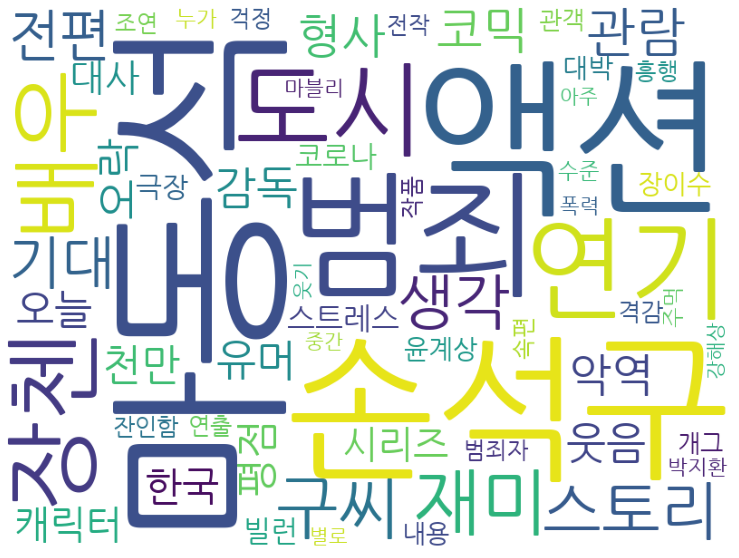

In [21]:
wordcloud(word)